# Retail Supermarket Exploratory Data Analysis (EDA)

## About Dataset

The dataset contains sales details of different stores of a supermarket chain that has multiple stores in different parts of the US.
With columns such as:
- Ship Mode
- Segment
- Country
- City
- State
- Postal code
- Region
- Category
- Sub-category
- Sales
- Quantity
- Discount
- Profit

## Objective

The primary objective of analyzing the supermarket sales dataset through data visualization are to derive valuable insights for strategic decision-making. This involves understanding the overall sales trend over time, optimizing logistics by identifying commonly used ship modes, and recognizing regional patterns to tailor marketing strategies. The analysis also aims to prioritize product categories based on sales contribution, optimize pricing strategies by studying the correlation between discounts and profits, and identify high and low-performing regions for targeted interventions. Additionally, insights into quantity sold variations across product categories aid in inventory management, while understanding discount distribution among customer segments supports targeted promotions. Evaluating profit across shipping modes helps improve delivery efficiency, and exploring the correlation between quantity sold and profit provides insights into the relationship between sales volume and financial performance. Ultimately, these objectives aim to foster informed decision-making for the supermarket chain.

## Analysis Questions

- Which ship mode is most commonly used?
- How do sales vary across different regions?
- Which product categories contribute the most to sales?
- What is the correlation between discount and profit?
- Which cities or states have the highest and lowest sales?
- How does the quantity sold vary across different product categories?
- What is the distribution of discounts across different segments?
- How does profit vary with respect to different shipping modes?
- Is there a correlation between quantity sold and profit?

# Environment Preparation

## Import software libraries

In [1]:
import sys
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

# Summarize software libraries used.
print('Libraries used in this project:')
print('- Python {}'.format(sys.version))
print('- pandas {}'.format(pd.__version__))
print('- Matplotlib {}'.format(matplotlib.__version__))
print('- Seaborn {}'.format(sns.__version__))

Libraries used in this project:
- Python 3.10.9 | packaged by Anaconda, Inc. | (main, Mar  1 2023, 18:18:15) [MSC v.1916 64 bit (AMD64)]
- pandas 1.5.3
- Matplotlib 3.7.0
- Seaborn 0.12.2


# Data Preparation

## Load and preview the data

In [2]:
pd.set_option('display.max_columns', None)
data = pd.read_csv(R"C:\Users\Dell\Downloads\EDA\Retail Supermarket\Superstore.csv")
data.head(5)

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Check the shape of the data

In [3]:
data.shape

(9994, 13)

## Check the unique number of columns

In [4]:
data.nunique()

Ship Mode          4
Segment            3
Country            1
City             531
State             49
Postal Code      631
Region             4
Category           3
Sub-Category      17
Sales           5825
Quantity          14
Discount          12
Profit          7287
dtype: int64

## Check the data types

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


## Create ID column

In [6]:
import random
import string

# Specify the number of random IDs you want to generate
num_ids = len(data)

# Fixed alphabet prefix
prefix = 'ABC'

# Set to store unique IDs
unique_ids_set = set()

# Generate unique random IDs
while len(unique_ids_set) < num_ids:
    random_id = prefix + ''.join(random.choices(string.digits, k=8))
    unique_ids_set.add(random_id)

# Convert the set to a list and create a DataFrame with a column named 'ID'
unique_ids_list = list(unique_ids_set)
data['ID'] = pd.DataFrame({'ID': unique_ids_list})

# Display the unique IDs without duplicates
print("Unique IDs without duplicates:")
print(data['ID'])

Unique IDs without duplicates:
0       ABC49620734
1       ABC21865675
2       ABC67158236
3       ABC54528917
4       ABC86819415
           ...     
9989    ABC70229534
9990    ABC94427689
9991    ABC98656660
9992    ABC28055755
9993    ABC36841529
Name: ID, Length: 9994, dtype: object


In [7]:
column_to_move = 'ID'

# Create a list of column names with the desired order
new_order = [column_to_move] + [col for col in data.columns if col != column_to_move]

# Reorder the DataFrame columns
data = data[new_order]
data.head()

,ID,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,ABC49620734,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,ABC21865675,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,ABC67158236,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,ABC54528917,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,ABC86819415,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


## Count column values

In [8]:
for column in data.columns:
    value_counts = data[column].value_counts()
    print(f"Value counts for {column}:\n{value_counts}\n")

Value counts for ID:
ABC49620734    1
ABC38821942    1
ABC35797782    1
ABC51958332    1
ABC99982942    1
              ..
ABC07735802    1
ABC86891341    1
ABC00828651    1
ABC82493968    1
ABC36841529    1
Name: ID, Length: 9994, dtype: int64

Value counts for Ship Mode:
Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

Value counts for Segment:
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64

Value counts for Country:
United States    9994
Name: Country, dtype: int64

Value counts for City:
New York City      915
Los Angeles        747
Philadelphia       537
San Francisco      510
Seattle            428
                  ... 
Glenview             1
Missouri City        1
Rochester Hills      1
Palatine             1
Manhattan            1
Name: City, Length: 531, dtype: int64

Value counts for State:
California              2001
New York                1128
Texas         

## Check Null Values

In [9]:
data.isnull().sum()

ID              0
Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

# Descriptive Statistics

In [10]:
data.describe(include = "all")

,ID,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
count,9994,9994,9994,9994,9994,9994,9994.000000,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,9994,4,3,1,531,49,NaN,4,3,17,NaN,NaN,NaN,NaN
top,ABC49620734,Standard Class,Consumer,United States,New York City,California,NaN,West,Office Supplies,Binders,NaN,NaN,NaN,NaN
freq,1,5968,5191,9994,915,2001,NaN,3203,6026,1523,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,55190.379428,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
std,NaN,NaN,NaN,NaN,NaN,NaN,32063.693350,NaN,NaN,NaN,623.245101,2.225110,0.206452,234.260108
min,NaN,NaN,NaN,NaN,NaN,NaN,1040.000000,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,NaN,NaN,NaN,NaN,NaN,NaN,23223.000000,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,NaN,NaN,NaN,NaN,NaN,NaN,56430.500000,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,NaN,NaN,NaN,NaN,NaN,NaN,90008.000000,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000


# Exploratory Data Analysis

## 1. Which ship mode is most commonly used?
    Use a bar chart to compare the frequency of different ship modes and identify the most commonly used shipping method.

In [11]:
# Group sales, profit and quantity by category
ship_mode_analysis = data['Ship Mode'].value_counts()
ship_mode_analysis

Standard Class    5968
Second Class      1945
First Class       1538
Same Day           543
Name: Ship Mode, dtype: int64

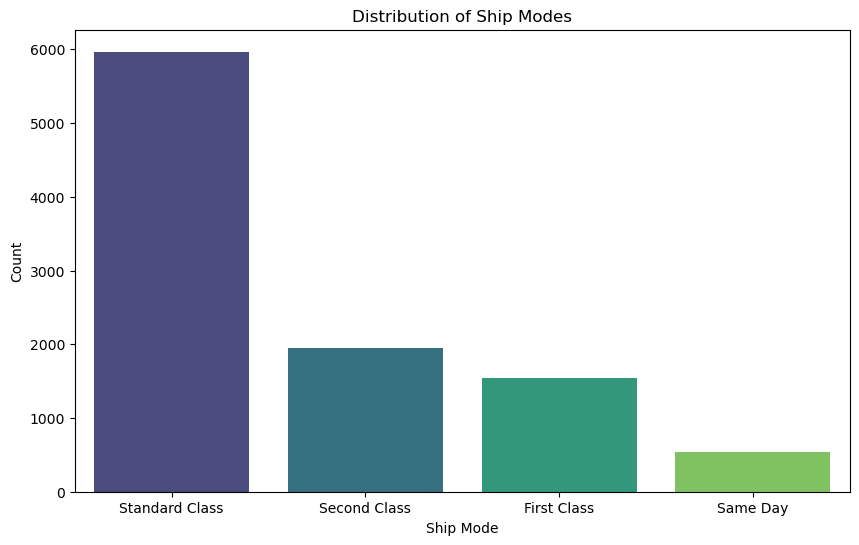

In [12]:
# Create a bar plot using seaborn
plt.figure(figsize=(10, 6))
sns.barplot(x=ship_mode_analysis.index, y=ship_mode_analysis.values, palette='viridis')
plt.title('Distribution of Ship Modes')
plt.xlabel('Ship Mode')
plt.ylabel('Count')
plt.show()

## 2. How do sales vary across different regions?
    Create a a bar chart to compare sales performance in different regions of the US.

In [13]:
# Group sales by state
region_analysis = pd.DataFrame(data.groupby(['Region'])[['Sales']].sum())
region_analysis = region_analysis.sort_values(by='Sales', ascending=False)
region_analysis

,Sales
Region,
West,725457.8245
East,678781.2400
Central,501239.8908
South,391721.9050


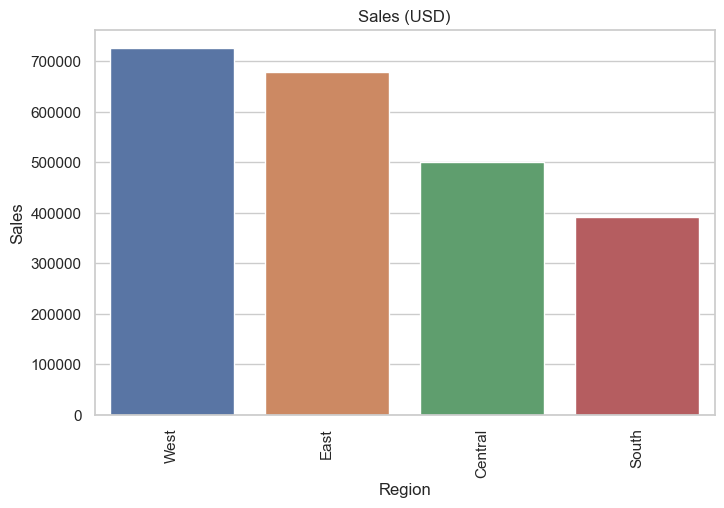

In [14]:
# Set the Seaborn theme
sns.set_theme(style="whitegrid")

# Create a bar plot for 'Sales'
plt.figure(figsize=(8, 5))
sns.barplot(x=region_analysis.index, y=region_analysis.Sales)
plt.title('Sales (USD)')

# Rotate x-axis labels for better visibility
plt.xticks(rotation='vertical')

# Show the plot
plt.show()


# 3. Which product categories contribute the most to sales?
    Generate a vertical bar chart to show the distribution of sales across different product 
    categories.

In [15]:
category_analysis = pd.DataFrame(data.groupby(['Category'])[['Sales']].sum())
category_analysis = category_analysis.sort_values(by='Sales', ascending=False)
category_analysis

,Sales
Category,
Technology,836154.0330
Furniture,741999.7953
Office Supplies,719047.0320


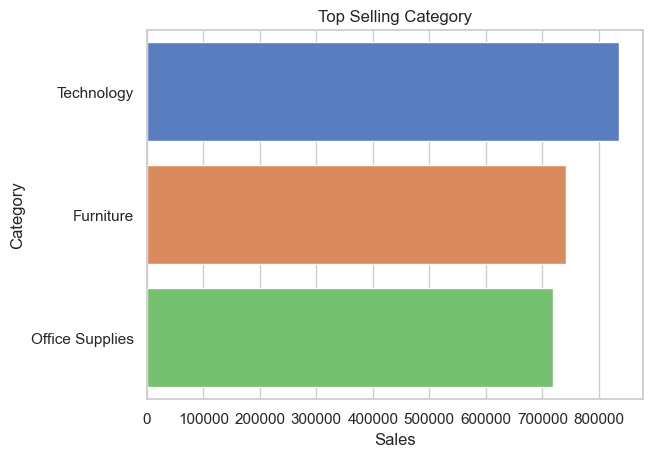

In [16]:
# Plot Vertical Bar Plot for Top Selling Sub-Category
sns.set_theme(style="whitegrid")
sns.barplot(data = category_analysis, y = category_analysis.index, x = category_analysis['Sales'], palette = "muted")
plt.title("Top Selling Category")
plt.show()

# 4. What is the correlation between discount and profit?
    Create a scatter plot to visualize the relationship between the discount offered and the resulting profit for each     
    transaction.

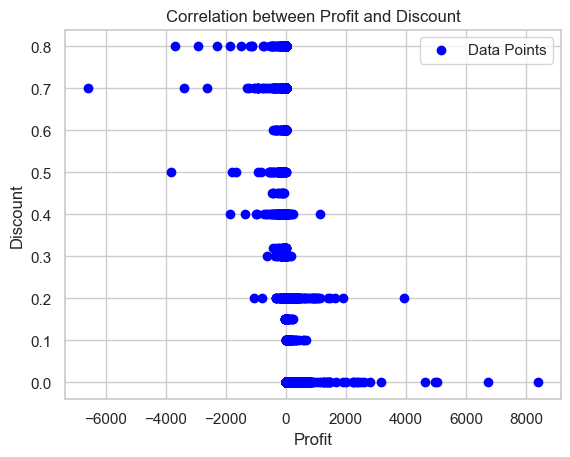

In [17]:
# Sample data for the scatter plot
x_values = data['Profit']
y_values = data['Discount']

# Plotting the scatter plot
plt.scatter(x_values, y_values, color='blue', marker='o', label='Data Points')

# Adding labels and title
plt.xlabel('Profit')
plt.ylabel('Discount')
plt.title('Correlation between Profit and Discount')

# Adding a legend
plt.legend()

# Display the plot
plt.show()

# 5. Which cities have the highest and lowest profits?
    Use a bar chart to identify the top 5 and bottom 5 performing cities or states based on sales.

In [18]:
city_sales = pd.DataFrame(data.groupby(['City'])['Profit'].sum())
city_sales = city_sales.sort_values(by='Profit',ascending = False)
top5 = city_sales[:5]
top5

,Profit
City,
New York City,62036.9837
Los Angeles,30440.7579
Seattle,29156.0967
San Francisco,17507.3854
Detroit,13181.7908


In [19]:
city_sales = pd.DataFrame(data.groupby(['City'])['Profit'].sum())
city_sales = city_sales.sort_values(by='Profit',ascending = False)
bottom5 = city_sales[-5:]
bottom5

,Profit
City,
Chicago,-6654.5688
Lancaster,-7239.0684
San Antonio,-7299.0502
Houston,-10153.5485
Philadelphia,-13837.7674


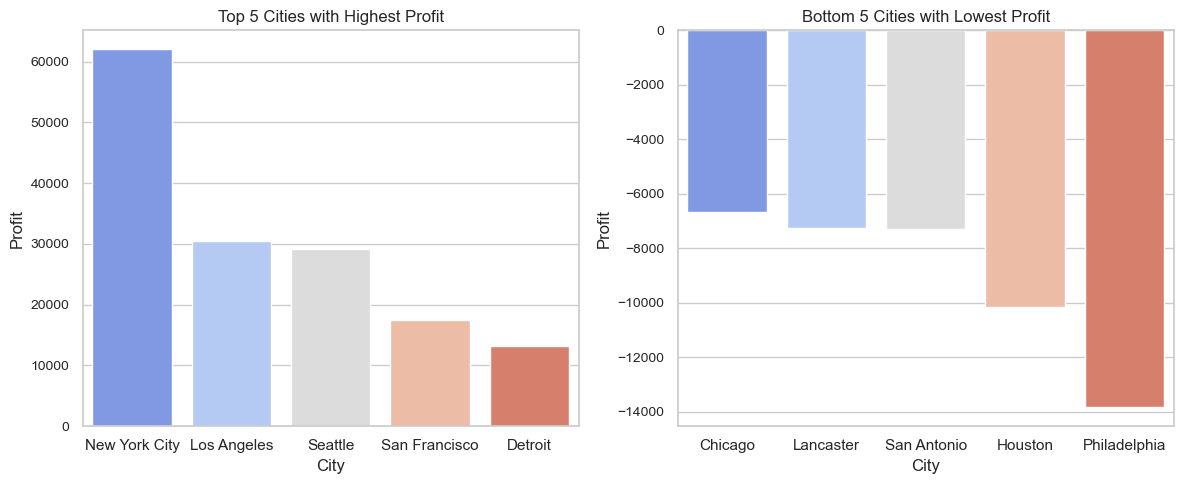

In [20]:
# Set for grouped plots - figure with a 1x2 grid of Axes
figure, axis = plt.subplots(1, 2, figsize=(12, 5))

sns.set_theme(style="whitegrid")

top5c = sns.barplot(data=top5, x=top5.index, y=top5.Profit, palette="coolwarm", ax=axis[0])
top5c.set_title("Top 5 Cities with Highest Profit")
top5c.set_yticklabels(top5c.get_yticklabels(), size=10)

# Plot Bar Plot for Best Selling Sub-Category
bottom5c = sns.barplot(data=bottom5, x=bottom5.index, y=bottom5.Profit, palette="coolwarm", ax=axis[1])
bottom5c.set_title("Bottom 5 Cities with Lowest Profit")
bottom5c.set_yticklabels(bottom5c.get_yticklabels(), size=10)

# Set spacing between subplots
figure.tight_layout()

plt.show()

# 6. Quantity Sold by Category with Subcategories?
    Generate stacked bar chart to compare the quantity sold for each product category with subcategories.

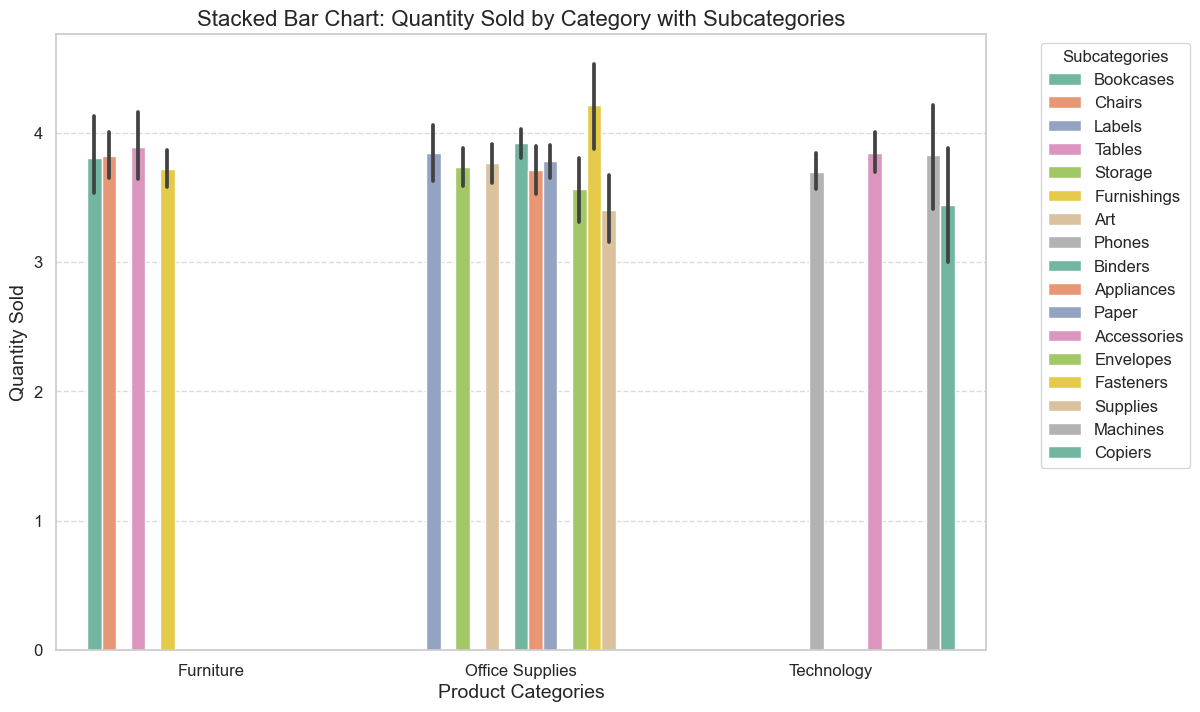

In [21]:
# Set a color palette
custom_palette = sns.color_palette("Set2")

# Plot a stacked bar chart using seaborn
plt.figure(figsize=(12, 8))
sns.barplot(x=data.Category, y=data.Quantity, hue= data['Sub-Category'], data=data, palette=custom_palette, edgecolor='w')

plt.title('Stacked Bar Chart: Quantity Sold by Category with Subcategories', fontsize=16)
plt.xlabel('Product Categories', fontsize=14)
plt.ylabel('Quantity Sold', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Subcategories', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

# 7. What is the distribution of discounts across different segments?
    Create a box plot to visualize the distribution of discounts for different customer segments.

In [22]:
discount_segment = pd.DataFrame(data.groupby(['Segment'])[['Discount']].describe())
discount_segment

Discount                                             
               count      mean       std  min  25%  50%  75%  max
Segment                                                          
Consumer      5191.0  0.158141  0.207485  0.0  0.0  0.2  0.2  0.8
Corporate     3020.0  0.158228  0.206548  0.0  0.0  0.2  0.2  0.8
Home Office   1783.0  0.147128  0.203119  0.0  0.0  0.0  0.2  0.8

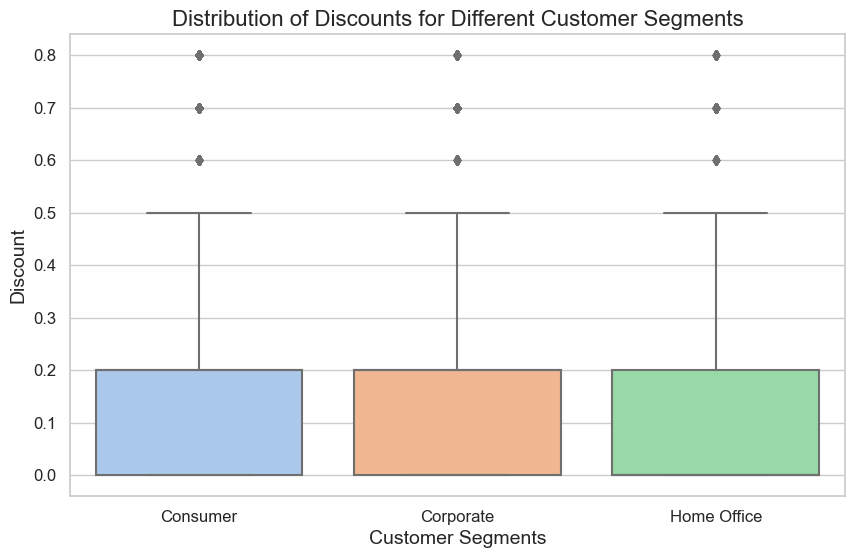

In [23]:
# Set a color palette
custom_palette = sns.color_palette("pastel")

# Create a box plot using seaborn
plt.figure(figsize=(10, 6))

sns.boxplot(x=data['Segment'], y=data['Discount'], data=data, palette=custom_palette)

plt.title('Distribution of Discounts for Different Customer Segments', fontsize=16)
plt.xlabel('Customer Segments', fontsize=14)
plt.ylabel('Discount', fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

# 8. Create Heatmap for numerical data correlation
    Is there a correlation between the total sales and the overall profit across different stores?

In [24]:
data_corr = data
# Convert 'SST' column to boolean (assuming it contains True/False values)
data_corr['Postal Code'] = data_corr['Postal Code'].astype(object)
data_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ID            9994 non-null   object 
 1   Ship Mode     9994 non-null   object 
 2   Segment       9994 non-null   object 
 3   Country       9994 non-null   object 
 4   City          9994 non-null   object 
 5   State         9994 non-null   object 
 6   Postal Code   9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Category      9994 non-null   object 
 9   Sub-Category  9994 non-null   object 
 10  Sales         9994 non-null   float64
 11  Quantity      9994 non-null   int64  
 12  Discount      9994 non-null   float64
 13  Profit        9994 non-null   float64
dtypes: float64(3), int64(1), object(10)
memory usage: 1.1+ MB


In [25]:
corr_matrix = data_corr.corr()

corr_matrix

,Sales,Quantity,Discount,Profit
Sales,1.000000,0.200795,-0.028190,0.479064
Quantity,0.200795,1.000000,0.008623,0.066253
Discount,-0.028190,0.008623,1.000000,-0.219487
Profit,0.479064,0.066253,-0.219487,1.000000


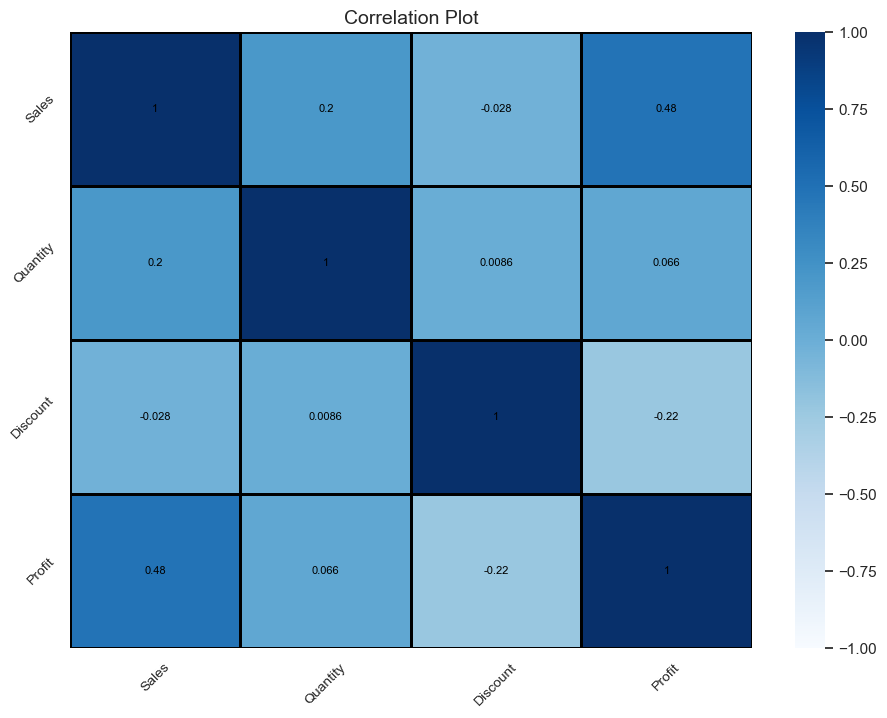

In [26]:
fig = plt.figure(figsize=(11, 8))

sns.heatmap(corr_matrix,
            cmap='Blues',  # Use 'Blues' colormap for blue saturation
            linewidth=0.75,
            linecolor='black',
            cbar=True,
            vmin=-1,
            vmax=1,
            annot=True,
            annot_kws={'size': 8, 'color': 'black'})

plt.tick_params(labelsize=10, rotation=45)
plt.title('Correlation Plot', size=14)
plt.show()


# Analysis Questions

- Which ship mode is most commonly used?
- How do sales vary across different regions?
- Which product categories contribute the most to sales?
- What is the correlation between discount and profit?
- Which cities have the highest and lowest sales?
- Quantity Sold by Category with Subcategories?
- What is the distribution of discounts across different segments?
- Create Heatmap for numerical data correlation?

# Conclusion

- Standard Class is a ship mode is most commonly used.
- West Region has the highest sales performance.
- Technology is product category that contributes the most to sales.
- The correlation between discount and profit is negatively correlated.
- New York City is city that has the highest sales and Philadelphia is city that has the lowest sales?
- Quantity Sold by Office Supplies Category with Fasteners Subcategory is the most.
- The data distribution of discounts across different segments is high between 0 to 0.2
- Data correlation between Sales and Profit is 0.48